In [ ]:
#Get hold of dataset in Azure Storage Blob
import pandas as pd 
!pip install azure-storage==0.32.0
from azure.storage.blob import BlockBlobService
STORAGEACCOUNTNAME=""
STORAGEACCOUNTKEY=""
block_blob_service = BlockBlobService(account_name=STORAGEACCOUNTNAME, account_key=STORAGEACCOUNTKEY)
block_blob_service.get_blob_to_path('test', 'test.csv', 'test.csv')
df = pd.read_csv('test.csv')
df

# Transformation

In [72]:
#print datatypes
df.dtypes

Date1    int64
Date2    int64
dtype: object

In [73]:
#Replace specific data with 'Something'
df['Date2'] = df['Date2'].replace(['20160302'], 'Something')

In [74]:
df

,Date1,Date2
0,20151001,20170112
1,20140406,Something


In [75]:
df.dtypes

Date1     int64
Date2    object
dtype: object

In [78]:
Sum = df['Date1'].sum()
#Add new column
df['Date3'] = Sum
df

,Date1,Date2,Date3
0,20151001,20170112,40291407
1,20140406,Something,40291407


In [ ]:
#If you have NaN in your dataset, you can use df['Column']=df['Column'].fillna('NULL') to fill column NaN's with NULL

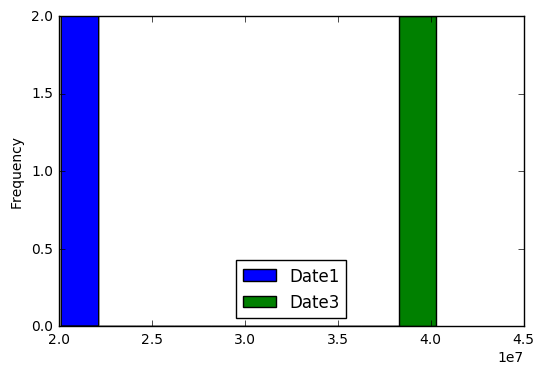

In [80]:
import matplotlib.pyplot as plt
data = df
#counter = Counter(data)
#print(counter)
#plt.hist(data, bins=np.arange(data.min(), data.max()+2))

data.plot.hist()
plt.show()

In [ ]:
# Convert Column to categorical and perform binning into 3 categories based on ranges from scalar values
bins = [-1, 1, 40, 100]
df['Column'] = pd.cut(df['Column'], bins, labels=[0, 1, 2])

In [ ]:
#Convert dataframe to CSV
df.to_csv('CleanDataset.csv', index=False)

#Save csv to Azure Storage Blob
block_blob_service.create_blob_from_path(
    container_name,
    output_filename,
    output_filename,
    content_settings=ContentSettings(content_type='text/csv')
    )